# Matts Data Exploration Notebook

In [381]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [382]:
#Read the data into notebook
df=pd.read_csv('zillow_data.csv')

In [383]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Try and get Dates alone

In [384]:
filter_col1 = [col for col in df if col.startswith('20')]

In [385]:
filter_col2=[col for col in df if col.startswith('199')]

In [386]:
filter_col1.append(filter_col2)

In [395]:
dates_df=df.drop(['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],axis=1)

In [396]:
dates_df2=dates_df.stack().reset_index()

In [397]:
dates_df2

,level_0,level_1,0
0,0,1996-04,334200.0
1,0,1996-05,335400.0
2,0,1996-06,336500.0
3,0,1996-07,337600.0
4,0,1996-08,338500.0
...,...,...,...
3744699,14722,2017-12,348900.0
3744700,14722,2018-01,350400.0
3744701,14722,2018-02,353000.0
3744702,14722,2018-03,356000.0


In [398]:
dates_df2=dates_df2.rename({'level_1':'Date',0:'Median_Value'},axis='columns')

In [399]:
dates_df2.drop(['level_0'],axis=1,inplace=True)

In [400]:
dates_df2.columns

Index(['Date', 'Median_Value'], dtype='object')

In [401]:
dates_df2['Date']=pd.to_datetime(dates_df2['Date'])

In [402]:
dates_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 2 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Median_Value  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 MB


In [403]:
dates_df2.set_index('Date',inplace=True)

In [404]:
dates_df2

,Median_Value
Date,
1996-04-01,334200.0
1996-05-01,335400.0
1996-06-01,336500.0
1996-07-01,337600.0
1996-08-01,338500.0
...,...
2017-12-01,348900.0
2018-01-01,350400.0
2018-02-01,353000.0


In [405]:
into_df=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank']

In [406]:
other_df= df[into_df]

In [407]:
other_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank
0,84654,60657,Chicago,IL,Chicago,Cook,1
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2
2,91982,77494,Katy,TX,Houston,Harris,3
3,84616,60614,Chicago,IL,Chicago,Cook,4
4,93144,79936,El Paso,TX,El Paso,El Paso,5
...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720
14720,75672,40404,Berea,KY,Richmond,Madison,14721
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722


### Try new direction

In [408]:
def melt_data2(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [409]:
df=melt_data2(df)

In [410]:
df.set_index('time',inplace=True)

In [411]:
df.RegionID.value_counts().sort_values()

76690     46
99281     46
79637     46
73597     46
85339     46
        ... 
77986    265
92334    265
77984    265
86185    265
99930    265
Name: RegionID, Length: 14723, dtype: int64

In [412]:
df

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,209300.0
2018-04-01,3293,59107,14720,Woodstock,NH,Claremont,Grafton,225800.0
2018-04-01,40404,75672,14721,Berea,KY,Richmond,Madison,133400.0


In [352]:
#font = {'family' : 'normal',
        #'weight' : 'bold',
        #'size'   : 22}

#plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [413]:
list2=['RegionID','value']
df_plot= df[list2]

In [414]:
df_plot

,RegionID,value
time,,
1996-04-01,84654,334200.0
1996-04-01,90668,235700.0
1996-04-01,91982,210400.0
1996-04-01,84616,498100.0
1996-04-01,93144,77300.0
...,...,...
2018-04-01,58333,209300.0
2018-04-01,59107,225800.0
2018-04-01,75672,133400.0


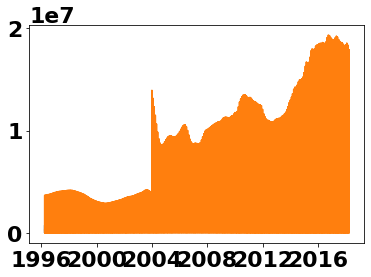

In [415]:
fig,ax= plt.subplots()
ax.plot(df_plot)


In [416]:
new_df=df.groupby(['time','City','RegionID']).mean()

In [417]:
new_df

RegionName  SizeRank     value
time       City         RegionID                                
1996-04-01 Abbeville    88633          70510      4358   47900.0
           Aberdeen     66718          21001      4197  110800.0
                        69850          28315      7078   79800.0
                        94053          83210     12949   65100.0
                        99840          98520      5029   86600.0
...                                      ...       ...       ...
2018-04-01 Zionsville   77955          46077      3608  394800.0
           Zionville    70145          28698     13180  164800.0
           Zumbro Falls 82545          55991     14454  262800.0
           Zumbrota     82546          55992     10870  191600.0
           Zuni         67864          23898     13586  190300.0

[3744704 rows x 3 columns]

In [418]:
new_df.drop(['RegionName','SizeRank'],axis=1,inplace=True)

In [419]:
new_df

value
time       City         RegionID          
1996-04-01 Abbeville    88633      47900.0
           Aberdeen     66718     110800.0
                        69850      79800.0
                        94053      65100.0
                        99840      86600.0
...                                    ...
2018-04-01 Zionsville   77955     394800.0
           Zionville    70145     164800.0
           Zumbro Falls 82545     262800.0
           Zumbrota     82546     191600.0
           Zuni         67864     190300.0

[3744704 rows x 1 columns]

In [420]:
plot_this= df[['RegionID','value']]

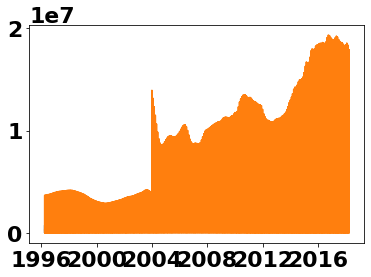

In [421]:
fig,ax=plt.subplots()
ax.plot(plot_this)

In [422]:
plot_this.isna().sum()

RegionID    0
value       0
dtype: int64

In [423]:
# Rename RegionName to be Zipcode
df=df.rename({'RegionName':'Zipcode'},axis='columns')

In [424]:
df

,Zipcode,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,77300.0
...,...,...,...,...,...,...,...,...
2018-04-01,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,209300.0
2018-04-01,3293,59107,14720,Woodstock,NH,Claremont,Grafton,225800.0
2018-04-01,40404,75672,14721,Berea,KY,Richmond,Madison,133400.0


In [425]:
#drop no longer relevant columns
df.drop(['RegionID','SizeRank','City','CountyName'],axis=1,inplace=True)

In [426]:
df

,Zipcode,State,Metro,value
time,,,,
1996-04-01,60657,IL,Chicago,334200.0
1996-04-01,75070,TX,Dallas-Fort Worth,235700.0
1996-04-01,77494,TX,Houston,210400.0
1996-04-01,60614,IL,Chicago,498100.0
1996-04-01,79936,TX,El Paso,77300.0
...,...,...,...,...
2018-04-01,1338,MA,Greenfield Town,209300.0
2018-04-01,3293,NH,Claremont,225800.0
2018-04-01,40404,KY,Richmond,133400.0


### Create a Arizona dataframe and focus only on Arizona for now

In [427]:
Arizona_df= df[(df['State'] == 'AZ')]

In [428]:
Arizona_df

,Zipcode,State,Metro,value
time,,,,
1996-04-01,85032,AZ,Phoenix,95400.0
1996-04-01,85710,AZ,Tucson,94600.0
1996-04-01,85225,AZ,Phoenix,101200.0
1996-04-01,85308,AZ,Phoenix,124800.0
1996-04-01,85281,AZ,Phoenix,81200.0
...,...,...,...,...
2018-04-01,86332,AZ,Prescott,172500.0
2018-04-01,85645,AZ,Tucson,152300.0
2018-04-01,85928,AZ,Show Low,225100.0


In [429]:
print('Number of Zipcodes in Arizona_df:', Arizona_df['Zipcode'].nunique())

Number of Zipcodes in Arizona_df: 230


In [430]:
Arizona_df_grouped=Arizona_df.groupby('Zipcode').mean()

In [433]:
Arizona_df_grouped

,value
Zipcode,
85003,267899.245283
85008,124401.132075
85012,347115.471698
85013,189566.792453
85014,186123.018868
...,...
86413,106110.112360
86426,142161.132075
86429,183313.962264


In [434]:
Arizona_grouped = Arizona_df.groupby(['Zipcode'], as_index = True).resample('M').sum()
Arizona_grouped.drop(columns = 'Zipcode', inplace = True)
Arizona_grouped.head()

value
Zipcode time                
85003   1996-04-30  109700.0
        1996-05-31  110500.0
        1996-06-30  111300.0
        1996-07-31  112200.0
        1996-08-31  113100.0

In [437]:
metro_group = Arizona_df.groupby('Metro')

In [438]:
metro_group = metro_group.value.mean()
metro_group = metro_group.sort_values(ascending=False).head(10)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


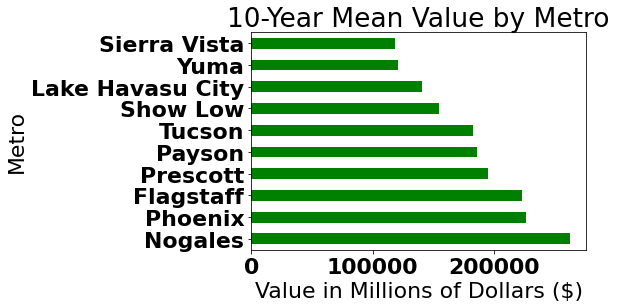

<Figure size 432x288 with 0 Axes>

In [439]:
metro_group.plot.barh(color='green')
plt.title('10-Year Mean Value by Metro')
plt.xlabel('Value in Millions of Dollars ($)')
plt.show()
plt.savefig('10yr-metro-mean-value')

In [322]:
# stationarity check with Dickey-Fuller test
def stationarity_check(df):
    '''Takes time series dataframe and returns with results for Dickey-Fuller test'''
    dftest = adfuller(df.dropna())
    print('\nResults of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [325]:
stationarity_check(Arizona_grouped)


Results of Dickey-Fuller Test: 

Test Statistic                -1.255244e+01
p-value                        2.190871e-23
#Lags Used                     6.000000e+01
Number of Observations Used    5.871400e+04
Critical Value (1%)           -3.430461e+00
Critical Value (5%)           -2.861589e+00
Critical Value (10%)          -2.566796e+00
dtype: float64


In [459]:
def plot_zip(zipcode):
    series = Arizona_grouped.loc[zipcode,'value']
    fig, ax = plt.subplots(figsize=(18,5))
    series.plot(ax=ax);

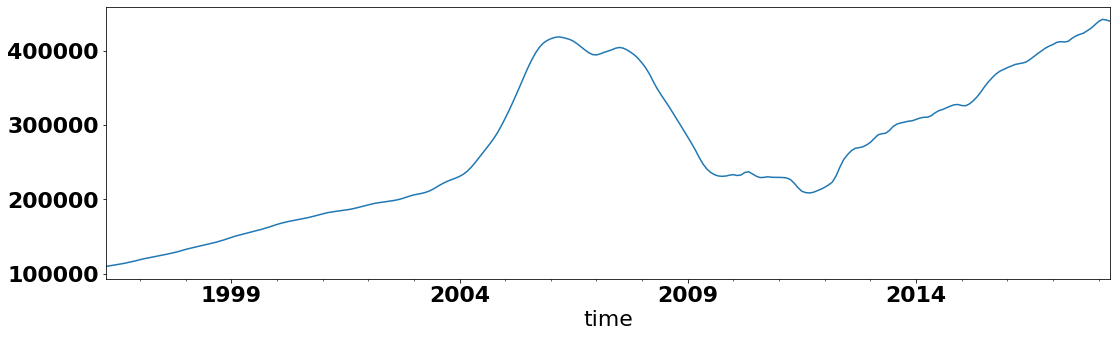

In [461]:
plot_zip(85003)

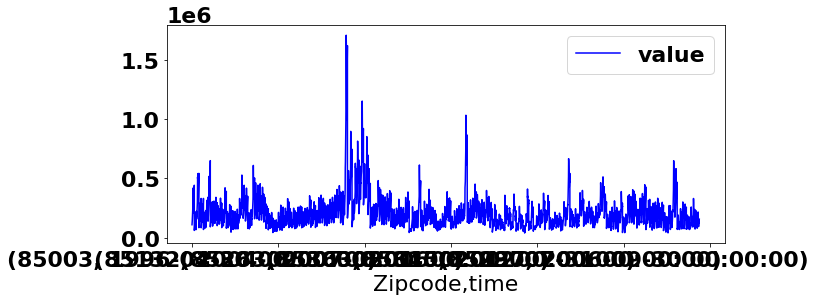

In [447]:
def stationarity_check2(TS):
    
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None


# Plot the time series
Arizona_grouped.plot(figsize=(10,4), color='blue');